**Cyberbulling**


In [32]:
from purifytext import clean_text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

Data Loading


In [16]:
df = pd.read_csv("data.csv")

In [17]:
df.head()

,Comment,Insult
0,"""You fuck your dad.""",1
1,"""i really don't understand your point.\xa0 It ...",0
2,"""A\\xc2\\xa0majority of Canadians can and has ...",0
3,"""listen if you dont wanna get married to a man...",0
4,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0


In [18]:
round(df["Insult"].value_counts()/ df.shape[0]*100,2)

0    73.58
1    26.42
Name: Insult, dtype: float64

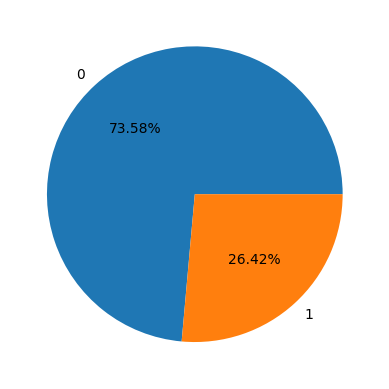

In [19]:
# plt.figure(figsize=(8, 8))
plt.pie(
    x=df["Insult"].value_counts().values,
    labels=df["Insult"].value_counts().index,
    autopct="%.2f%%",
)
plt.show()

In [20]:
def generate_word_cloud(dataframe, feature, level, y):
    filtered_df = dataframe[feature][dataframe[level] == y]
    text_data = " ".join(filtered_df)
    wordcloud = WordCloud(
        background_color="black", colormap="coolwarm", max_words=10
    ).generate(text_data)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

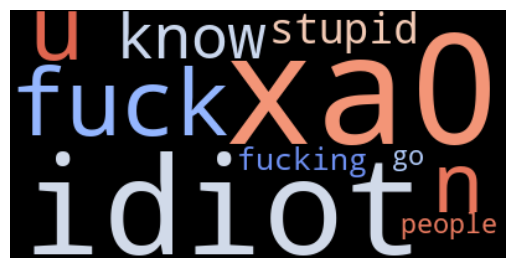

In [21]:
generate_word_cloud(dataframe=df, feature="Comment", level="Insult", y=1)

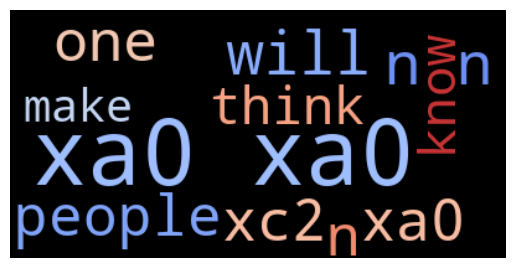

In [22]:
generate_word_cloud(dataframe=df, feature="Comment", level="Insult", y=0)

In [23]:
clean_df = clean_text(
    dataframe=df, column_name="Comment", lemmatizing=True, stemming=False
)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️


c:\Users\vatsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\purifytext\text_preprocessing.py:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")



⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



In [24]:
clean_df.head()

,Comment,Insult
0,fuck dad,1
1,really understand pointxa seems mixing apple o...,0
2,axcxamajority canadian wrong againnnunless sup...,0
3,listen want get married man woman would bother...,0
4,cxec buean xuuedng uubueddng biuecu txecnh cxf...,0


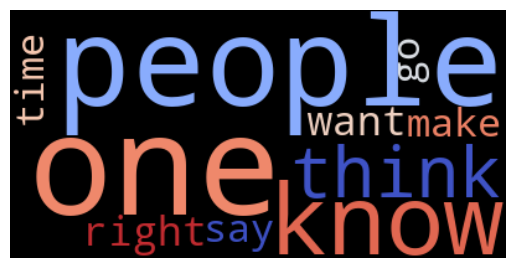

In [25]:
generate_word_cloud(dataframe=clean_df, feature="Comment", level="Insult", y=0)

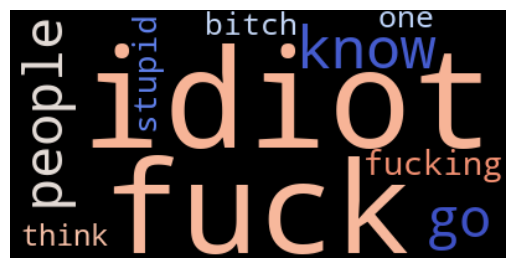

In [26]:
generate_word_cloud(dataframe=clean_df, feature="Comment", level="Insult", y=1)

In [27]:
X = clean_df["Comment"]
y = clean_df["Insult"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes (MultinomialNB)", MultinomialNB()),
    ("Support Vector Machines (SVM)", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting Machines (XGBoost)", XGBClassifier()),
    ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Ensemble Methods (AdaBoost)", AdaBoostClassifier()),
    (
        "Ensemble Methods (Voting Classifier)",
        VotingClassifier(
            estimators=[
                ("lr", LogisticRegression()),
                ("svm", SVC()),
                ("rf", RandomForestClassifier()),
            ]
        ),
    ),
    (
        "Ensemble Methods (Bagging)",
        BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    ),
    ("Ensemble Methods (Gradient Boosting)", GradientBoostingClassifier()),
]

In [30]:
def evaluate_classification_model(model_name, model, X_train, y_train, X_test, y_test):
    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)
    model.fit(X_train_res, y_train_res)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    print("Training Report")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_train, y_train_pred))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("Test Report")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

In [31]:
for model_name, model in models:
    evaluate_classification_model(model_name, model, X_train, y_train, X_test, y_test)

Training Report
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3901
           1       0.87      0.84      0.85      1374

    accuracy                           0.92      5275
   macro avg       0.90      0.90      0.90      5275
weighted avg       0.92      0.92      0.92      5275

Logistic Regression Confusion Matrix:
[[3724  177]
 [ 225 1149]]
Test Report
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       951
           1       0.69      0.63      0.66       368

    accuracy                           0.82      1319
   macro avg       0.78      0.76      0.77      1319
weighted avg       0.81      0.82      0.82      1319

Logistic Regression Confusion Matrix:
[[848 103]
 [137 231]]
Training Report
Naive Bayes (MultinomialNB) Classification Report:
              precision    recall  f1-s

c:\Users\vatsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Report
Ensemble Methods (Bagging) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3901
           1       0.97      0.97      0.97      1374

    accuracy                           0.98      5275
   macro avg       0.98      0.98      0.98      5275
weighted avg       0.98      0.98      0.98      5275

Ensemble Methods (Bagging) Confusion Matrix:
[[3865   36]
 [  47 1327]]
Test Report
Ensemble Methods (Bagging) Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       951
           1       0.63      0.64      0.63       368

    accuracy                           0.79      1319
   macro avg       0.74      0.75      0.75      1319
weighted avg       0.80      0.79      0.79      1319

Ensemble Methods (Bagging) Confusion Matrix:
[[814 137]
 [134 234]]
Training Report
Ensemble Methods (Gradient Boosting) Classification Report:
  

1. **Logistic Regression**: Balanced performance with good generalization across training and test sets.
2. **Voting Classifier**: High accuracy and balanced metrics, indicating robustness and good generalization.
3. **Random Forest**: Excellent training performance and relatively high test accuracy, though slightly overfit.
4. **Gradient Boosting Machines (XGBoost)**: Strong training and test performance with good precision and recall balance.
5. **Support Vector Machines (SVM)**: High training accuracy with good generalization, despite some overfitting.

In [33]:
vectorizer = TfidfVectorizer()

In [35]:
X_train_transformed = vectorizer.fit_transform(X_train)

In [36]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

In [43]:
log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
svm_clf = SVC(probability=True, random_state=42)
nb_clf = MultinomialNB()

In [44]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf), 
    ('rf', rf_clf), 
    ('svm', svm_clf),
    ('nb', nb_clf)
], voting='soft')

In [45]:
voting_clf.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [46]:
X_test_transformed = vectorizer.transform(X_test)
y_train_pred = voting_clf.predict(X_train_transformed)
y_test_pred = voting_clf.predict(X_test_transformed)
# Print classification report
print("Training Report")
print(f"Voting Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print confusion matrix
print(f"Voting Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test Report")
# Print classification report
print(f"Voting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print(f"Voting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Report
Voting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3901
           1       0.97      0.99      0.98      1374

    accuracy                           0.99      5275
   macro avg       0.99      0.99      0.99      5275
weighted avg       0.99      0.99      0.99      5275

Voting Confusion Matrix:
[[3865   36]
 [   8 1366]]
Test Report
Voting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       951
           1       0.73      0.59      0.65       368

    accuracy                           0.83      1319
   macro avg       0.79      0.75      0.77      1319
weighted avg       0.82      0.83      0.82      1319

Voting Confusion Matrix:
[[872  79]
 [151 217]]


In [47]:
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [48]:
X_test_transformed = vectorizer.transform(X_test)
y_train_pred = log_clf.predict(X_train_transformed)
y_test_pred = log_clf.predict(X_test_transformed)
# Print classification report
print("Training Report")
print(f"LogisticRegression Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print confusion matrix
print(f"LogisticRegression Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test Report")
# Print classification report
print(f"LogisticRegression Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print(f"LogisticRegression Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Report
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3901
           1       0.87      0.84      0.85      1374

    accuracy                           0.92      5275
   macro avg       0.90      0.90      0.90      5275
weighted avg       0.92      0.92      0.92      5275

LogisticRegression Confusion Matrix:
[[3724  177]
 [ 225 1149]]
Test Report
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       951
           1       0.69      0.63      0.66       368

    accuracy                           0.82      1319
   macro avg       0.78      0.76      0.77      1319
weighted avg       0.81      0.82      0.82      1319

LogisticRegression Confusion Matrix:
[[848 103]
 [137 231]]


In [49]:
import pickle

In [51]:
with open('voting_model.pkl', 'wb') as model_file:
    pickle.dump(voting_clf, model_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)